In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np, pandas as pd
import pickle

def gaus(x, normalization,location, stdev):
    u = (x - location)/stdev
    return normalization* np.exp(-0.5*u**2)

def findindex(xvals,xval): 
    minima = 66e6
    for i,elem in enumerate(xvals):
        # Update minimum difference from xval and index of the minimum difference
        if abs(xval-elem) < minima: 
            minima = abs(xval-elem) 
            index = i
    return index

def Landau(x, normalization,location,stdev):
    #print(type(x))
    u=(x-location)*3.591/stdev/2.355
    renormalization = 1.64872*normalization
    return renormalization * np.exp(-u/2 - np.exp(-u)/2)

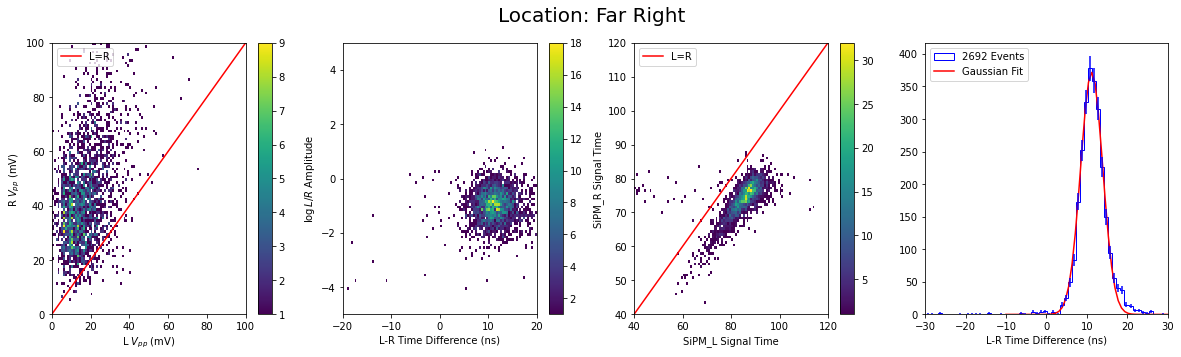

Actual Average: 11.03, Actual st.dev.: 6.81
Fit Average:    11.19, Fit st.dev.:    2.74


In [10]:
with open('./LongbarTiming_part2_6-12.pkl', 'rb') as f:
    df232 = pickle.load(f)
df232cut = df232.query("ch4_time_fit >= 0 & ch3_time_fit >= 0 & ch4_P2P_fit > 0 & ch3_P2P_fit > 0")
fig,ax = plt.subplots(1,4,figsize=(20,5))
fig.suptitle("Location: Far Right", fontsize=20)
binresolution = 1
bincount = int(np.floor( (max(df232cut.ch4_time_fit-df232cut.ch3_time_fit)-min(df232cut.ch4_time_fit-df232cut.ch3_time_fit))/binresolution ))

ax[0].set_xlabel("L $V_{pp}$ (mV)")
ax[0].set_ylabel("R $V_{pp}$ (mV)")
AmpImage = ax[0].hist2d(df232cut.ch3_P2P_fit,df232cut.ch4_P2P_fit,bins=(100,100),cmin=1,label=f"{len(df232cut.ch4_time_fit)} Events",range=[[0, 100], [0, 100]])
ax[0].plot(np.linspace(0,100,2),np.linspace(0,100,2),color="red",label="L=R")
fig.colorbar(AmpImage[-1],ax=ax[0])
ax[0].legend()

ax[1].set_xlabel("L-R Time Difference (ns)")
ax[1].set_ylabel("$\log{L/R}$ Amplitude")
AmpDistance = ax[1].hist2d(df232cut.ch3_time_fit - df232cut.ch4_time_fit, np.log(df232cut.ch3_P2P_fit/df232cut.ch4_P2P_fit),bins=(100,100),cmin=1,label=f"{len(df232cut.ch4_time_fit)} Events",range=[[-20, 20], [-5, 5]])
fig.colorbar(AmpDistance[-1],ax=ax[1])

ax[2].set_xlabel("SiPM_L Signal Time")
ax[2].set_ylabel("SiPM_R Signal Time")
TimeImage = ax[2].hist2d(df232cut.ch3_time_fit,df232cut.ch4_time_fit,bins=(100,100),cmin=1,label=f"{len(df232cut.ch4_time_fit)} Events",range=[[40, 120], [40, 120]])
mintime = min(min(df232cut.ch4_time_fit),min(df232cut.ch3_time_fit))
maxtime = max(max(df232cut.ch4_time_fit),max(df232cut.ch3_time_fit))
fig.colorbar(TimeImage[-1],ax=ax[2])
ax[2].plot(np.linspace(mintime,maxtime,2),np.linspace(mintime,maxtime,2),color="red",label="L=R")
ax[2].legend()

ax[3].set_xlabel("L-R Time Difference (ns)")
timecounts,timebins,bars = ax[3].hist(df232cut.ch3_time_fit-df232cut.ch4_time_fit,bincount,color="b", label=f"{len(df232cut.ch4_time_fit)} Events",histtype="step")
timecenters = timebins[:-1]/2+timebins[1:]/2
coeff, covar = curve_fit(gaus, timecenters, timecounts)
gausstart,gausstop = (-10,30)
ax[3].plot(np.linspace(gausstart,gausstop,50),gaus(np.linspace(gausstart,gausstop,50),*coeff),label="Gaussian Fit",color="r")
ax[3].set_xlim(-30,30)
ax[3].errorbar(timecenters, timecounts, yerr=np.sqrt(timecounts),color="b",linestyle="None")
ax[3].legend()

plt.show()
avg = sum(timecenters*timecounts)/sum(timecounts)
stdev = np.sqrt(sum((timecenters-avg)**2*timecounts)/sum(timecounts))

print(f"Actual Average: {avg:.2f}, Actual st.dev.: {stdev:.2f}")
print(f"Fit Average:    {coeff[1]:.2f}, Fit st.dev.:    {coeff[2]:.2f}")

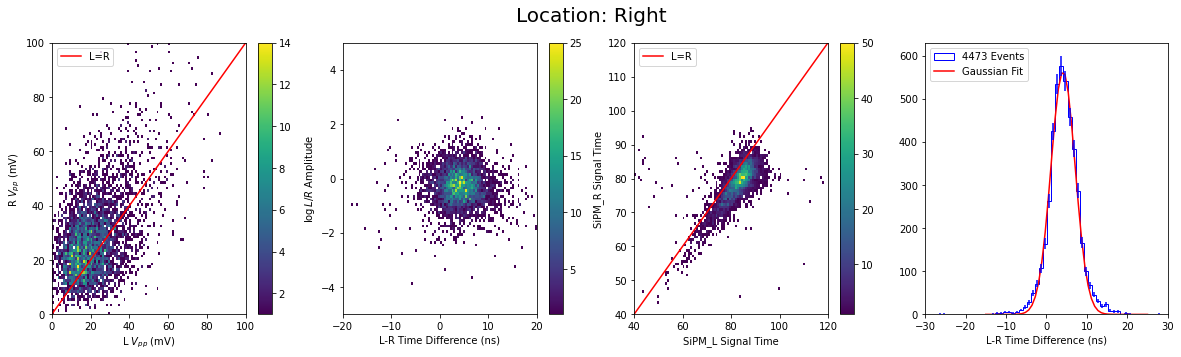

Actual Average: 4.03, Actual st.dev.: 6.00
Fit Average:    4.12, Fit st.dev.:    3.00


In [11]:
with open('LongbarTiming_part2_4-12.pkl', 'rb') as f:
    df174 = pickle.load(f)
df174cut = df174.query("ch4_time_fit >= 0 & ch3_time_fit >= 0 & ch4_P2P_fit > 0 & ch3_P2P_fit > 0")
fig,ax = plt.subplots(1,4,figsize=(20,5))
fig.suptitle("Location: Right", fontsize=20)
binresolution = 1
bincount = int(np.floor( (max(df174cut.ch4_time_fit-df174cut.ch3_time_fit)-min(df174cut.ch4_time_fit-df174cut.ch3_time_fit))/binresolution ))

ax[0].set_xlabel("L $V_{pp}$ (mV)")
ax[0].set_ylabel("R $V_{pp}$ (mV)")
AmpImage = ax[0].hist2d(df174cut.ch3_P2P_fit,df174cut.ch4_P2P_fit,bins=(100,100),cmin=1,label=f"{len(df174cut.ch4_time_fit)} Events",range=[[0, 100], [0, 100]])
ax[0].plot(np.linspace(0,100,2),np.linspace(0,100,2),color="red",label="L=R")
fig.colorbar(AmpImage[-1],ax=ax[0])
ax[0].legend()

ax[1].set_xlabel("L-R Time Difference (ns)")
ax[1].set_ylabel("$\log{L/R}$ Amplitude")
AmpDistance = ax[1].hist2d(df174cut.ch3_time_fit - df174cut.ch4_time_fit, np.log(df174cut.ch3_P2P_fit/df174cut.ch4_P2P_fit),bins=(100,100),cmin=1,label=f"{len(df174cut.ch4_time_fit)} Events",range=[[-20, 20], [-5, 5]])
fig.colorbar(AmpDistance[-1],ax=ax[1])

ax[2].set_xlabel("SiPM_L Signal Time")
ax[2].set_ylabel("SiPM_R Signal Time")
TimeImage = ax[2].hist2d(df174cut.ch3_time_fit,df174cut.ch4_time_fit,bins=(100,100),cmin=1,label=f"{len(df174cut.ch4_time_fit)} Events",range=[[40, 120], [40, 120]])
mintime = min(min(df174cut.ch4_time_fit),min(df174cut.ch3_time_fit))
maxtime = max(max(df174cut.ch4_time_fit),max(df174cut.ch3_time_fit))
fig.colorbar(TimeImage[-1],ax=ax[2])
ax[2].plot(np.linspace(mintime,maxtime,2),np.linspace(mintime,maxtime,2),color="red",label="L=R")
ax[2].legend()

ax[3].set_xlabel("L-R Time Difference (ns)")
timecounts,timebins,bars = ax[3].hist(df174cut.ch3_time_fit-df174cut.ch4_time_fit,bincount,color="b", label=f"{len(df174cut.ch4_time_fit)} Events",histtype="step")
timecenters = timebins[:-1]/2+timebins[1:]/2
coeff, covar = curve_fit(gaus, timecenters, timecounts)
gausstart,gausstop = (-15,25)
ax[3].plot(np.linspace(gausstart,gausstop,50),gaus(np.linspace(gausstart,gausstop,50),*coeff),label="Gaussian Fit",color="r")
ax[3].set_xlim(-30,30)
ax[3].errorbar(timecenters, timecounts, yerr=np.sqrt(timecounts),color="b",linestyle="None")
ax[3].legend()

plt.show()
avg = sum(timecenters*timecounts)/sum(timecounts)
stdev = np.sqrt(sum((timecenters-avg)**2*timecounts)/sum(timecounts))

print(f"Actual Average: {avg:.2f}, Actual st.dev.: {stdev:.2f}")
print(f"Fit Average:    {coeff[1]:.2f}, Fit st.dev.:    {coeff[2]:.2f}")

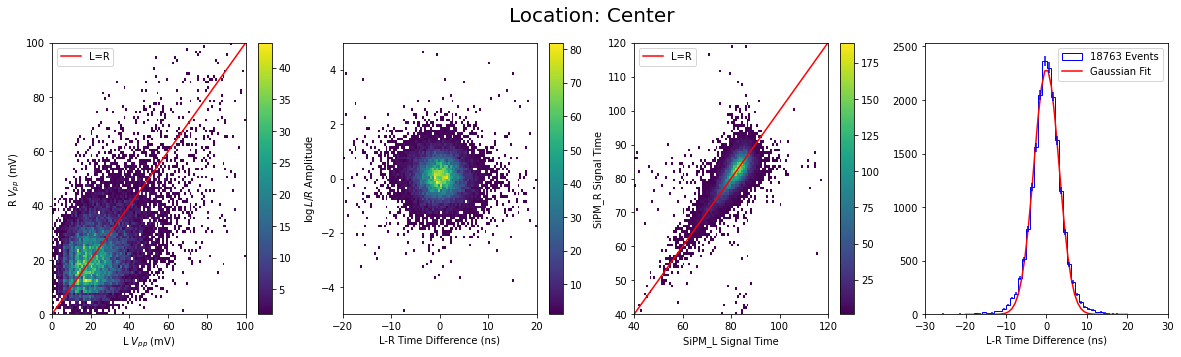

Actual Average: -0.05, Actual st.dev.: 4.93
Fit Average:    0.01, Fit st.dev.:    3.11


In [12]:
with open('LongbarTiming_part2_3-12.pkl', 'rb') as f:
    df139 = pickle.load(f)
df139cut = df139.query("ch4_time_fit >= 0 & ch3_time_fit >= 0 & ch4_P2P_fit > 0 & ch3_P2P_fit > 0")
fig,ax = plt.subplots(1,4,figsize=(20,5))
fig.suptitle("Location: Center", fontsize=20)
binresolution = 1
bincount = int(np.floor( (max(df139cut.ch4_time_fit-df139cut.ch3_time_fit)-min(df139cut.ch4_time_fit-df139cut.ch3_time_fit))/binresolution ))

ax[0].set_xlabel("L $V_{pp}$ (mV)")
ax[0].set_ylabel("R $V_{pp}$ (mV)")
AmpImage = ax[0].hist2d(df139cut.ch3_P2P_fit,df139cut.ch4_P2P_fit,bins=(100,100),cmin=1,label=f"{len(df139cut.ch4_time_fit)} Events",range=[[0, 100], [0, 100]])
ax[0].plot(np.linspace(0,100,2),np.linspace(0,100,2),color="red",label="L=R")
fig.colorbar(AmpImage[-1],ax=ax[0])
ax[0].legend()

ax[1].set_xlabel("L-R Time Difference (ns)")
ax[1].set_ylabel("$\log{L/R}$ Amplitude")
AmpDistance = ax[1].hist2d(df139cut.ch3_time_fit - df139cut.ch4_time_fit, np.log(df139cut.ch3_P2P_fit/df139cut.ch4_P2P_fit),bins=(100,100),cmin=1,label=f"{len(df139cut.ch4_time_fit)} Events",range=[[-20, 20], [-5, 5]])
fig.colorbar(AmpDistance[-1],ax=ax[1])

ax[2].set_xlabel("SiPM_L Signal Time")
ax[2].set_ylabel("SiPM_R Signal Time")
TimeImage = ax[2].hist2d(df139cut.ch3_time_fit,df139cut.ch4_time_fit,bins=(100,100),cmin=1,label=f"{len(df139cut.ch4_time_fit)} Events",range=[[40, 120], [40, 120]])
mintime = min(min(df139cut.ch4_time_fit),min(df139cut.ch3_time_fit))
maxtime = max(max(df139cut.ch4_time_fit),max(df139cut.ch3_time_fit))
fig.colorbar(TimeImage[-1],ax=ax[2])
ax[2].plot(np.linspace(mintime,maxtime,2),np.linspace(mintime,maxtime,2),color="red",label="L=R")
ax[2].legend()

ax[3].set_xlabel("L-R Time Difference (ns)")
timecounts,timebins,bars = ax[3].hist(df139cut.ch3_time_fit-df139cut.ch4_time_fit,bincount,color="b", label=f"{len(df139cut.ch4_time_fit)} Events",histtype="step")
timecenters = timebins[:-1]/2+timebins[1:]/2
coeff, covar = curve_fit(gaus, timecenters, timecounts)
gausstart,gausstop = (-20,20)
ax[3].plot(np.linspace(gausstart,gausstop,50),gaus(np.linspace(gausstart,gausstop,50),*coeff),label="Gaussian Fit",color="r")
ax[3].set_xlim(-30,30)
ax[3].errorbar(timecenters, timecounts, yerr=np.sqrt(timecounts),color="b",linestyle="None")
ax[3].legend()

plt.show()
avg = sum(timecenters*timecounts)/sum(timecounts)
stdev = np.sqrt(sum((timecenters-avg)**2*timecounts)/sum(timecounts))

print(f"Actual Average: {avg:.2f}, Actual st.dev.: {stdev:.2f}")
print(f"Fit Average:    {coeff[1]:.2f}, Fit st.dev.:    {coeff[2]:.2f}")

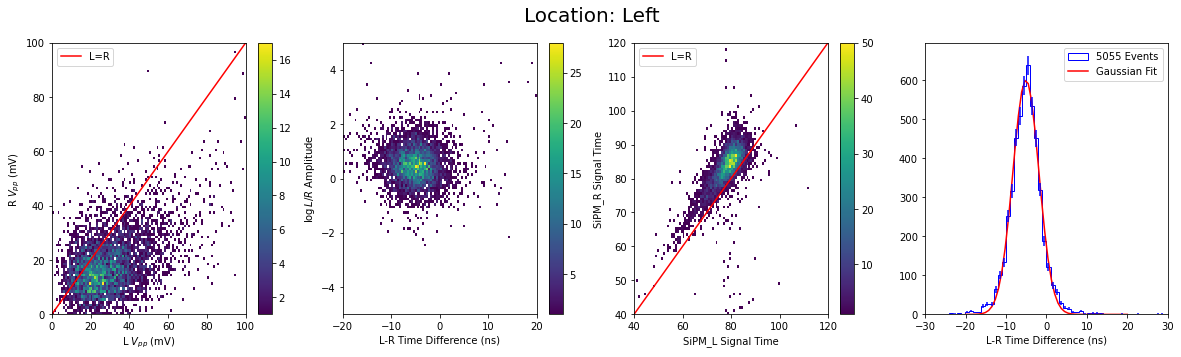

Actual Average: -4.79, Actual st.dev.: 5.98
Fit Average:    -5.07, Fit st.dev.:    -3.22


In [13]:
with open('LongbarTiming_part2_2-12.pkl', 'rb') as f:
    df97 = pickle.load(f)
    
df97cut = df97.query("ch4_time_fit >= 0 & ch3_time_fit >= 0 & ch4_P2P_fit > 0 & ch3_P2P_fit > 0")
fig,ax = plt.subplots(1,4,figsize=(20,5))
fig.suptitle("Location: Left", fontsize=20)
binresolution = 1
bincount = int(np.floor( (max(df97cut.ch4_time_fit-df97cut.ch3_time_fit)-min(df97cut.ch4_time_fit-df97cut.ch3_time_fit))/binresolution ))

ax[0].set_xlabel("L $V_{pp}$ (mV)")
ax[0].set_ylabel("R $V_{pp}$ (mV)")
AmpImage = ax[0].hist2d(df97cut.ch3_P2P_fit,df97cut.ch4_P2P_fit,bins=(100,100),cmin=1,label=f"{len(df97cut.ch4_time_fit)} Events",range=[[0, 100], [0, 100]])
ax[0].plot(np.linspace(0,100,2),np.linspace(0,100,2),color="red",label="L=R")
fig.colorbar(AmpImage[-1],ax=ax[0])
ax[0].legend()

ax[1].set_xlabel("L-R Time Difference (ns)")
ax[1].set_ylabel("$\log{L/R}$ Amplitude")
AmpDistance = ax[1].hist2d(df97cut.ch3_time_fit - df97cut.ch4_time_fit, np.log(df97cut.ch3_P2P_fit/df97cut.ch4_P2P_fit),bins=(100,100),cmin=1,label=f"{len(df97cut.ch4_time_fit)} Events",range=[[-20, 20], [-5, 5]])
fig.colorbar(AmpDistance[-1],ax=ax[1])

ax[2].set_xlabel("SiPM_L Signal Time")
ax[2].set_ylabel("SiPM_R Signal Time")
TimeImage = ax[2].hist2d(df97cut.ch3_time_fit,df97cut.ch4_time_fit,bins=(100,100),cmin=1,label=f"{len(df97cut.ch4_time_fit)} Events",range=[[40, 120], [40, 120]])
mintime = min(min(df97cut.ch4_time_fit),min(df97cut.ch3_time_fit))
maxtime = max(max(df97cut.ch4_time_fit),max(df97cut.ch3_time_fit))
fig.colorbar(TimeImage[-1],ax=ax[2])
ax[2].plot(np.linspace(mintime,maxtime,2),np.linspace(mintime,maxtime,2),color="red",label="L=R")
ax[2].legend()

ax[3].set_xlabel("L-R Time Difference (ns)")
timecounts,timebins,bars = ax[3].hist(df97cut.ch3_time_fit-df97cut.ch4_time_fit,bincount,color="b", label=f"{len(df97cut.ch4_time_fit)} Events",histtype="step")
timecenters = timebins[:-1]/2+timebins[1:]/2
coeff, covar = curve_fit(gaus, timecenters, timecounts)
gausstart,gausstop = (-20,20)
ax[3].plot(np.linspace(gausstart,gausstop,50),gaus(np.linspace(gausstart,gausstop,50),*coeff),label="Gaussian Fit",color="r")
ax[3].set_xlim(-30,30)
ax[3].errorbar(timecenters, timecounts, yerr=np.sqrt(timecounts),color="b",linestyle="None")
ax[3].legend()

plt.show()
avg = sum(timecenters*timecounts)/sum(timecounts)
stdev = np.sqrt(sum((timecenters-avg)**2*timecounts)/sum(timecounts))

print(f"Actual Average: {avg:.2f}, Actual st.dev.: {stdev:.2f}")
print(f"Fit Average:    {coeff[1]:.2f}, Fit st.dev.:    {coeff[2]:.2f}")

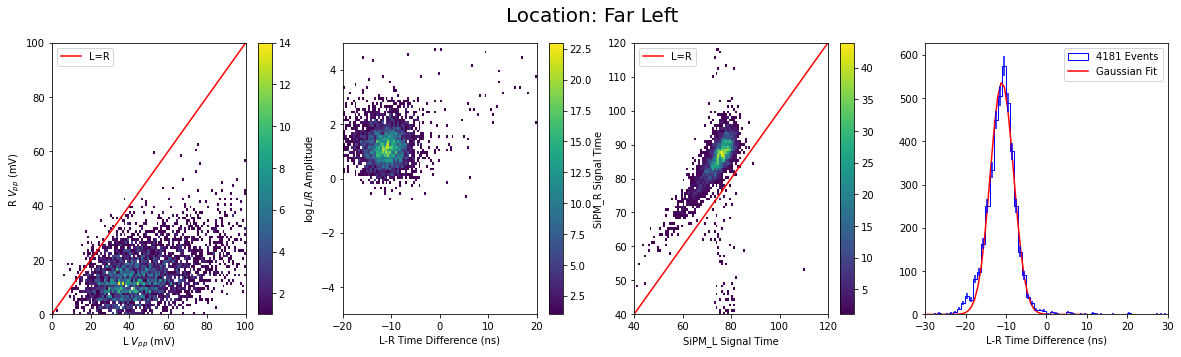

Actual Average: -10.16, Actual st.dev.: 8.96
Fit Average:    -11.00, Fit st.dev.:    2.89


In [14]:
with open('LongbarTiming_part2_1-12.pkl', 'rb') as f:
    df46 = pickle.load(f)
df46cut = df46.query("ch4_time_fit >= 0 & ch3_time_fit >= 0 & ch4_P2P_fit > 0 & ch3_P2P_fit > 0")
fig,ax = plt.subplots(1,4,figsize=(20,5))
fig.suptitle("Location: Far Left", fontsize=20)
binresolution = 1
bincount = int(np.floor( (max(df46cut.ch4_time_fit-df46cut.ch3_time_fit)-min(df46cut.ch4_time_fit-df46cut.ch3_time_fit))/binresolution ))

ax[0].set_xlabel("L $V_{pp}$ (mV)")
ax[0].set_ylabel("R $V_{pp}$ (mV)")
AmpImage = ax[0].hist2d(df46cut.ch3_P2P_fit,df46cut.ch4_P2P_fit,bins=(100,100),cmin=1,label=f"{len(df46cut.ch4_time_fit)} Events",range=[[0, 100], [0, 100]])
ax[0].plot(np.linspace(0,100,2),np.linspace(0,100,2),color="red",label="L=R")
fig.colorbar(AmpImage[-1],ax=ax[0])
ax[0].legend()

ax[1].set_xlabel("L-R Time Difference (ns)")
ax[1].set_ylabel("$\log{L/R}$ Amplitude")
AmpDistance = ax[1].hist2d(df46cut.ch3_time_fit - df46cut.ch4_time_fit, np.log(df46cut.ch3_P2P_fit/df46cut.ch4_P2P_fit),bins=(100,100),cmin=1,label=f"{len(df46cut.ch4_time_fit)} Events",range=[[-20, 20], [-5, 5]])
fig.colorbar(AmpDistance[-1],ax=ax[1])

ax[2].set_xlabel("SiPM_L Signal Time")
ax[2].set_ylabel("SiPM_R Signal Time")
TimeImage = ax[2].hist2d(df46cut.ch3_time_fit,df46cut.ch4_time_fit,bins=(100,100),cmin=1,label=f"{len(df46cut.ch4_time_fit)} Events",range=[[40, 120], [40, 120]])
mintime = min(min(df46cut.ch4_time_fit),min(df46cut.ch3_time_fit))
maxtime = max(max(df46cut.ch4_time_fit),max(df46cut.ch3_time_fit))
fig.colorbar(TimeImage[-1],ax=ax[2])
ax[2].plot(np.linspace(mintime,maxtime,2),np.linspace(mintime,maxtime,2),color="red",label="L=R")
ax[2].legend()

ax[3].set_xlabel("L-R Time Difference (ns)")
timecounts,timebins,bars = ax[3].hist(df46cut.ch3_time_fit-df46cut.ch4_time_fit,bincount,color="b", label=f"{len(df46cut.ch4_time_fit)} Events",histtype="step")
timecenters = timebins[:-1]/2+timebins[1:]/2
coeff, covar = curve_fit(gaus, timecenters, timecounts)
gausstart,gausstop = (-30,10)
ax[3].plot(np.linspace(gausstart,gausstop,50),gaus(np.linspace(gausstart,gausstop,50),*coeff),label="Gaussian Fit",color="r")
ax[3].set_xlim(-30,30)
ax[3].errorbar(timecenters, timecounts, yerr=np.sqrt(timecounts),color="b",linestyle="None")
ax[3].legend()

plt.show()
avg = sum(timecenters*timecounts)/sum(timecounts)
stdev = np.sqrt(sum((timecenters-avg)**2*timecounts)/sum(timecounts))

print(f"Actual Average: {avg:.2f}, Actual st.dev.: {stdev:.2f}")
print(f"Fit Average:    {coeff[1]:.2f}, Fit st.dev.:    {coeff[2]:.2f}")

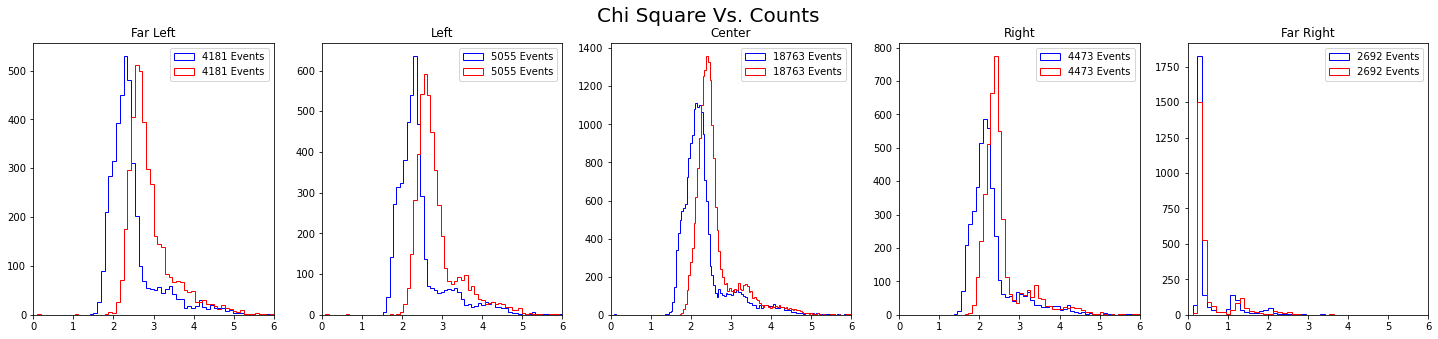

In [15]:
fig,ax = plt.subplots(1,5,figsize=(25,5))
fig.suptitle("Chi Square Vs. Counts", fontsize=20)
dfframes = [df46cut, df97cut, df139cut, df174cut, df232cut]
position = ["Far Left", "Left", "Center", "Right", "Far Right"]
for i in range(len(dfframes)):
    timecounts,timebins,bars = ax[i].hist(dfframes[i].ch3_chisq,int(np.sqrt(len(dfframes[i].ch3_chisq))),color="b", label=f"{len(dfframes[i].ch3_chisq)} Events",histtype="step",range = (0,6))
    timecounts,timebins,bars = ax[i].hist(dfframes[i].ch4_chisq,int(np.sqrt(len(dfframes[i].ch4_chisq))),color="r", label=f"{len(dfframes[i].ch4_chisq)} Events",histtype="step",range = (0,6))
    ax[i].set_xlim(0,6)
    ax[i].set_title(position[i])
    ax[i].legend()

[ 0.13754856 11.1944735   2.73916452]
[0.12566964 4.11529151 2.99974988]
[0.12208091 0.00993308 3.11415774]
[ 0.1181891  -5.07432534  3.22469511]
[  0.1282758  -10.99587264   2.88904411]


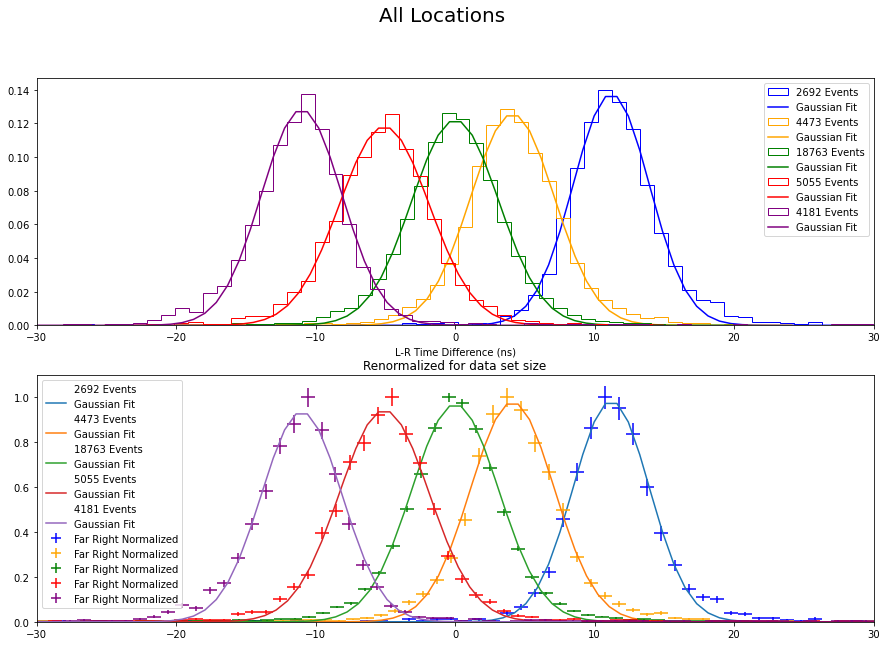

In [16]:
dataframes=[df232cut,df174cut,df139cut,df97cut,df46cut]
colors=["blue","orange","green","red","purple"]
locations=[232-14,174-14,139-14,97-14,46-14]
x = []
err = []

binresolution = 1

fig,ax = plt.subplots(2,1,figsize=(15,10))
fig.suptitle("All Locations", fontsize=20)

for i in range(len(dataframes)):
    bincount = int(np.floor( (max(dataframes[i].eval("ch3_time_fit-ch4_time_fit"))-min(dataframes[i].eval("ch3_time_fit-ch4_time_fit")))/binresolution ))
    count,binedges,bars=ax[0].hist(dataframes[i].eval("ch3_time_fit-ch4_time_fit"),bincount, label=f"{len(dataframes[i].ch4_time_fit)} Events",color=colors[i],density=True,histtype="step")
    bincenters = binedges[1:]/2+binedges[:-1]/2
    coeff, covar = curve_fit(gaus, bincenters, count)
    print(coeff)
    ax[0].plot(np.linspace(coeff[1]-20,coeff[1]+20,50),gaus(np.linspace(coeff[1]-20,coeff[1]+20,50),*coeff),label="Gaussian Fit",color=colors[i])
    renorm = 1/max(count)
    
    count,binedges,bars=ax[1].hist(dataframes[i].eval("ch3_time_fit-ch4_time_fit"),bincount, label=f"{len(dataframes[i].ch4_time_fit)} Events",color=colors[i],visible=False)
    bincenters = binedges[1:]/2+binedges[:-1]/2
    renorm = 1/max(count)
    ax[1].errorbar(bincenters,count*renorm,xerr=0.5*(bincenters[1]-bincenters[0]),yerr = np.sqrt(count)*renorm,color=colors[i],linestyle="",label="Far Right Normalized")
    
    coeff, covar = curve_fit(gaus, bincenters, count)
    ax[1].plot(np.linspace(coeff[1]-20,coeff[1]+20,50),gaus(np.linspace(coeff[1]-20,coeff[1]+20,50),*coeff)*renorm,label="Gaussian Fit")
    x.append(coeff[1])
    err.append(np.sqrt(covar[1][1]))

ax[0].set_xlabel("L-R Time Difference (ns)")
ax[0].legend()
ax[1].set_title("Renormalized for data set size")
ax[0].set_xlim(-30,30)
ax[1].set_xlim(-30,30)
ax[1].set_ylim(0,1.1)
ax[1].legend()

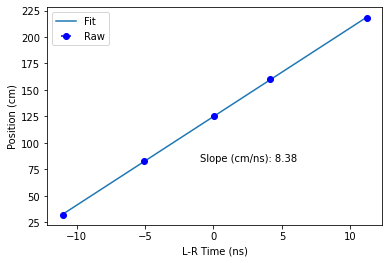

In [17]:
plt.errorbar(x,locations,xerr = err,fmt = 'o', color = "blue", ecolor = "blue", label = "Raw")
p = np.polyfit(x,locations,1)
plt.plot(x,np.array(x)*p[0]+p[1],label = "Fit")
plt.xlabel("L-R Time (ns)")
plt.ylabel("Position (cm)")
plt.annotate(str(f"Slope (cm/ns): {p[0]:.2f}"), xy = (x[-1] + 10, locations[-2]))
plt.legend()
plt.show()

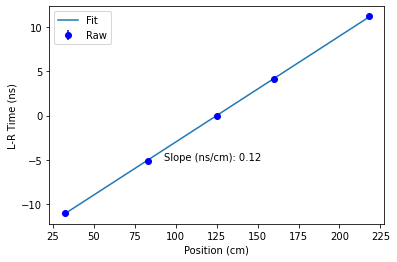

In [18]:
plt.errorbar(locations,x,yerr = err,fmt = 'o', color = "blue", ecolor = "blue", label = "Raw")
pinv = np.polyfit(locations,x,1)
plt.plot(locations,np.array(locations)*pinv[0]+pinv[1],label = "Fit")
plt.ylabel("L-R Time (ns)")
plt.xlabel("Position (cm)")
plt.annotate(str(f"Slope (ns/cm): {pinv[0]:.2f}"), xy = (locations[-2] + 10, x[-2]))
plt.legend()
plt.show()

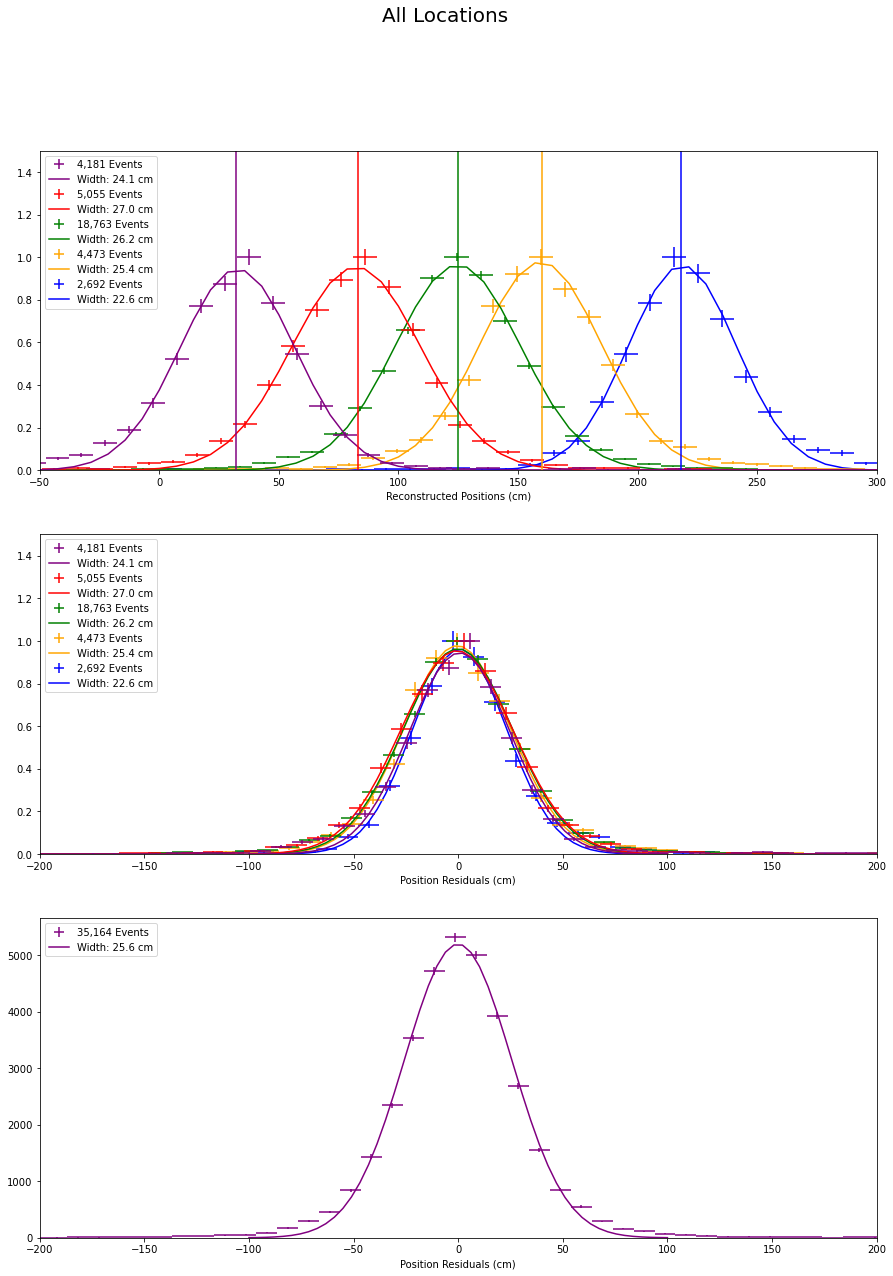

In [19]:
histdatas= [-666]*len(dataframes)
errs = [-666]*len(dataframes)
fits = [-666]*len(dataframes)
allresiduals=[]
binresolution = 10

fig,ax = plt.subplots(3,1,figsize=(15,20))
fig.suptitle("All Locations", fontsize=20)
for i in range(len(dataframes)):
    bincount = int(np.floor( ( max(dataframes[i].eval(f"(ch3_time_fit-ch4_time_fit)*{p[0]}+{p[1]}")) 
                              -min(dataframes[i].eval(f"(ch3_time_fit-ch4_time_fit)*{p[0]}+{p[1]}")) )/binresolution ))
    histdatas[i]=ax[0].hist(dataframes[i].eval(f"(ch3_time_fit-ch4_time_fit)*{p[0]}+{p[1]}"),bincount,visible=False)
    bincenters = histdatas[i][1][1:]/2+histdatas[i][1][:-1]/2
    
    coeff, covar = curve_fit(gaus, bincenters, histdatas[i][0]/max(histdatas[i][0]),p0=(1,locations[i],25))

    fits[i], = ax[0].plot(np.linspace(-50,300,50),gaus(np.linspace(-50,300,50),*coeff),
                          label=f"Width: {abs(coeff[2]):.1f} cm",color=colors[i])
    errs[i] = ax[0].errorbar(bincenters,histdatas[i][0]/max(histdatas[i][0]),
                   xerr=0.5*(bincenters[1]-bincenters[0]),yerr = np.sqrt(histdatas[i][0])/max(histdatas[i][0]),
                   color = colors[i],label=f"{len(dataframes[i]):,} Events",linestyle="")
    
    #make residuals plot
    allresiduals += dataframes[i].eval(f"((ch3_time_fit-ch4_time_fit)*{p[0]}+{p[1]})-({locations[i]})").tolist()

    rescount,resbins,resbars = ax[1].hist(dataframes[i].eval(f"((ch3_time_fit-ch4_time_fit)*{p[0]}+{p[1]})-({locations[i]})"),bincount,
                                          label=f"{len(dataframes[i].ch4_time_fit)} Events",visible=False,histtype="step")
    rescenters = resbins[1:]/2+resbins[:-1]/2
    coeff, covar = curve_fit(gaus, rescenters, rescount/max(rescount),p0=(1,0,25))

    ax[1].plot(np.linspace(-100,100,50),gaus(np.linspace(-100,100,50),*coeff),
               label=f"Width: {abs(coeff[2]):.1f} cm",color=colors[i])
    ax[1].errorbar(rescenters,rescount/max(rescount),
                   xerr = 0.5*(rescenters[1]-rescenters[0]), yerr = np.sqrt(rescount)/max(rescount), 
                   color = colors[i],linestyle="")

bincount = int(np.floor( ( max(allresiduals) - min(allresiduals) )/binresolution ))
#print(len(allresiduals))
rescount,resbins,resbars = ax[2].hist(allresiduals,bincount,visible=False)
#print("bin resolution",resbins[1]-resbins[0])
rescenters = resbins[1:]/2+resbins[:-1]/2
coeff, covar = curve_fit(gaus, rescenters, rescount,p0=(1000,0,25)) #,w=np.sqrt((zerr/z)**2+(err/y)**2)
myplt, = ax[2].plot(np.linspace(-100,100,50),gaus(np.linspace(-100,100,50),*coeff),label=f"Width: {abs(coeff[2]):.1f} cm",color=colors[i])
myerr = ax[2].errorbar(rescenters,rescount,
               xerr = 0.5*(rescenters[1]-rescenters[0]),yerr = np.sqrt(rescount),
               color = colors[i],linestyle="", label=f"{len(allresiduals):,} Events")
for i in range(5):
    ax[0].vlines(locations[i],0,10,color = colors[i])
ax[0].set_xlim(-50,300)
ax[0].set_ylim(0,1.5)
ax[0].set_xlabel("Reconstructed Positions (cm)")
ax[0].legend(handles=[errs[4],fits[4],errs[3],fits[3],errs[2],fits[2],errs[1],fits[1],errs[0],fits[0]],loc='upper left')
ax[1].set_xlim(-200,200)
ax[1].set_ylim(0,1.5)
ax[1].set_xlabel("Position Residuals (cm)")
ax[1].legend(handles=[errs[4],fits[4],errs[3],fits[3],errs[2],fits[2],errs[1],fits[1],errs[0],fits[0]],loc='upper left')
ax[2].set_xlim(-200,200)
ax[2].set_xlabel("Position Residuals (cm)")
ax[2].legend(handles=[myerr,myplt],loc='upper left')
plt.show()


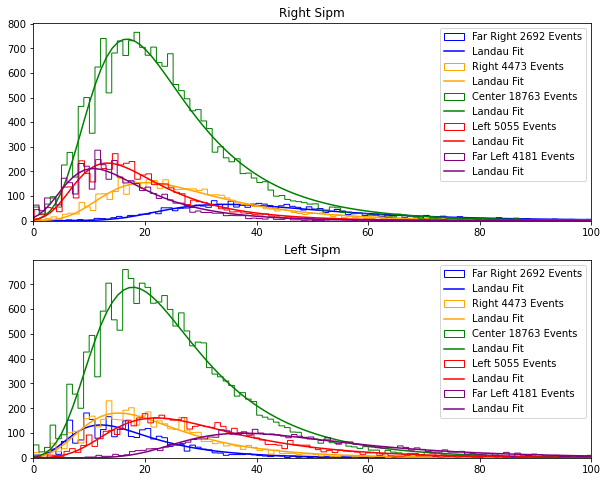

In [20]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
binresolution = 1
channels = ['ch4_P2P_fit','ch3_P2P_fit']
positions = ["Far Right", "Right", "Center", "Left", "Far Left"]
amplitude_R = np.array([])
err_R = np.array([])
amplitude_L = np.array([])
err_L = np.array([])


for dataframe,color,position in zip(dataframes,colors,positions):

    bincount = int(np.floor( (max(dataframe.ch4_P2P_fit)-min(dataframe.ch4_P2P_fit))/binresolution ))
    count,binedges,bars=ax[0].hist(dataframe.ch4_P2P_fit,bincount, label=f"{position} {len(dataframe.ch4_P2P_fit)} Events",color=color,visible=True,histtype="step")
    bincenters = binedges[1:]/2+binedges[:-1]/2
    coeff, covar = curve_fit(Landau, bincenters, count)
    ax[0].plot(np.linspace(0,100,100),Landau(np.linspace(0,100,100),*coeff), label=f"Landau Fit",color=color)
    amplitude_R = np.append(amplitude_R,coeff[1])
    err_R = np.append(err_R,np.sqrt(covar[1][1]))
    ax[0].legend()
    ax[0].set_xlim(0,100)
    ax[0].set_title("Right Sipm")
    
    bincount = int(np.floor( (max(dataframe.ch3_P2P_fit)-min(dataframe.ch3_P2P_fit))/binresolution ))
    count,binedges,bars=ax[1].hist(dataframe.ch3_P2P_fit,bincount, label=f"{position} {len(dataframe.ch3_P2P_fit)} Events",color=color,visible=True,histtype="step")
    bincenters = binedges[1:]/2+binedges[:-1]/2
    coeff, covar = curve_fit(Landau, bincenters, count)
    ax[1].plot(np.linspace(0,100,100),Landau(np.linspace(0,100,100),*coeff), label=f"Landau Fit",color=color)
    amplitude_L = np.append(amplitude_L,coeff[1])
    err_L = np.append(err_L,np.sqrt(covar[1][1]))
    ax[1].legend()
    ax[1].set_xlim(0,100)
    ax[1].set_title("Left Sipm")

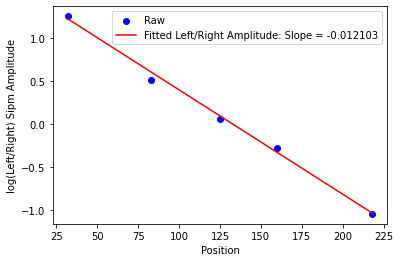

In [24]:
plt.scatter(locations,np.log(amplitude_L/amplitude_R),color = 'b', label = "Raw")
AmpLogFit = np.polyfit(locations,np.log(amplitude_L/amplitude_R),1,w=np.sqrt((err_L/amplitude_L)**2+(err_R/amplitude_R)**2)) #,w=np.sqrt((zerr/z)**2+(err/y)**2)
plt.plot(np.linspace(locations[0],locations[-1],2),AmpLogFit[1]+np.linspace(locations[0],locations[-1],2)*AmpLogFit[0],label = "Fitted Left/Right Amplitude: Slope = %f" %AmpLogFit[0],color = 'r')

plt.xlabel("Position")
plt.ylabel("log(Left/Right) Sipm Amplitude")
plt.legend()

Channel 4: [7.38467396e+00 6.80233990e-03]
Channel 3: [ 4.40425166e+01 -7.01091610e-03]


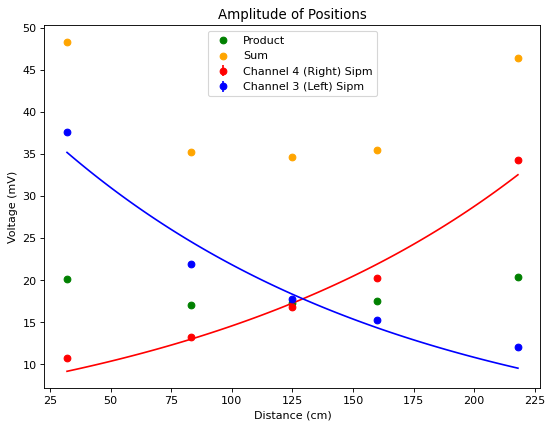

In [27]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(locations,amplitude_R,yerr=err_R,fmt = 'o',color = 'r', label = 'Channel 4 (Right) Sipm')
plt.errorbar(locations,amplitude_L,yerr=err_L,fmt = 'o', color = 'b', label = 'Channel 3 (Left) Sipm')

popt1, pcov1 = curve_fit(lambda t,a,b: a*np.exp(b*t),  locations,  amplitude_R,p0 = (4,0.01),sigma = err_R)
plt.plot(np.linspace(locations[0],locations[-1],100),popt1[0]*np.exp(popt1[1]*np.linspace(locations[0],locations[-1],100)),color = 'r')
popt2, pcov2 = curve_fit(lambda t,a,b: a*np.exp(b*t),  locations,  amplitude_L,p0 = (4,-0.01),sigma= err_L)
plt.plot(np.linspace(locations[0],locations[-1],100),popt2[0]*np.exp(popt2[1]*np.linspace(locations[0],locations[-1],100)),color = 'b')
print("Channel 4: %s" %popt1)
print("Channel 3: %s" %popt2)
plt.scatter(locations,np.sqrt(np.array(amplitude_R)*np.array(amplitude_L)),color = 'g', label = 'Product')
plt.scatter(locations,np.array(amplitude_R)+np.array(amplitude_L),color = 'orange', label = 'Sum')
plt.title("Amplitude of Positions")
plt.xlabel("Distance (cm)")
plt.ylabel("Voltage (mV)")
plt.legend()

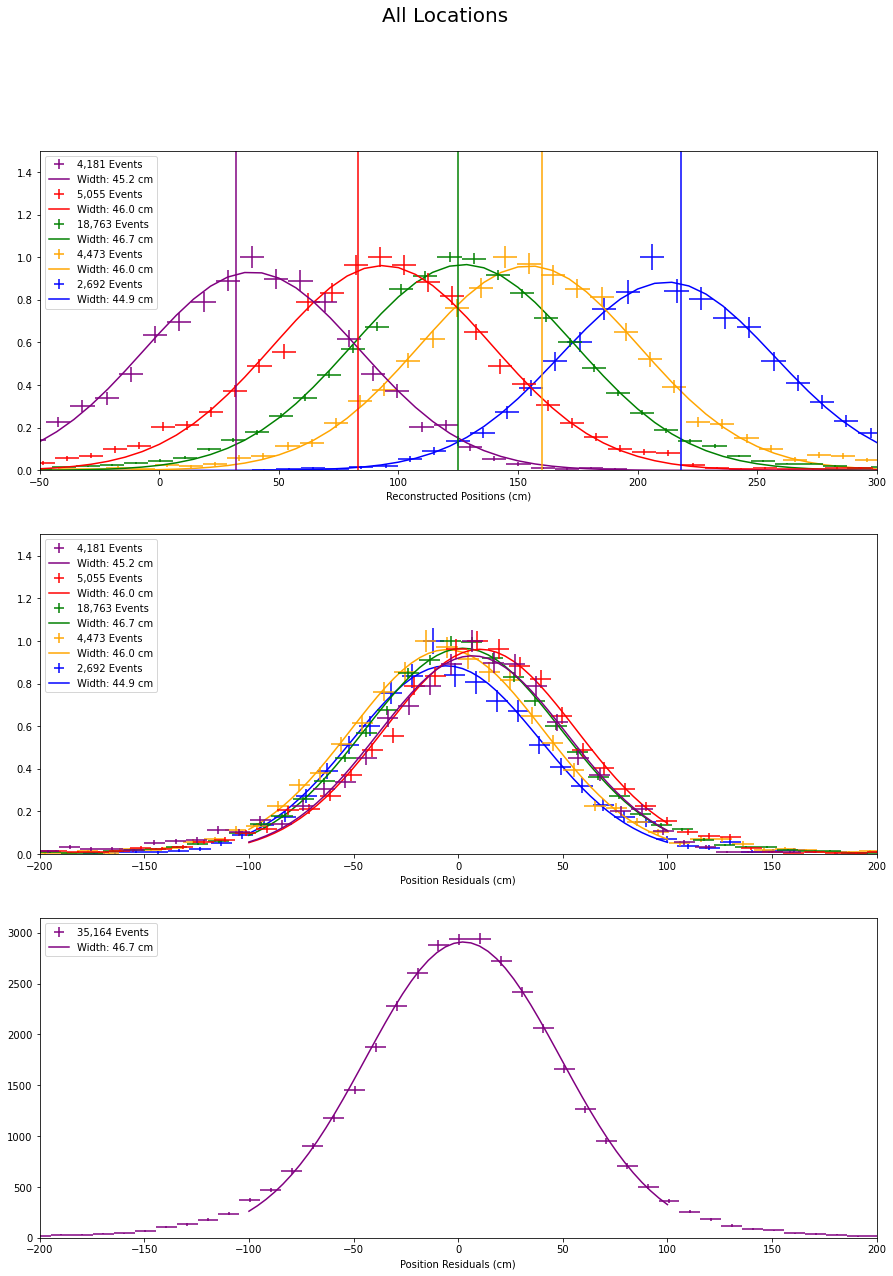

In [28]:
histdatas= [-666]*len(dataframes)
errs = [-666]*len(dataframes)
fits = [-666]*len(dataframes)
allresiduals=[]
binresolution = 10

fig,ax = plt.subplots(3,1,figsize=(15,20))
fig.suptitle("All Locations", fontsize=20)
for i in range(len(dataframes)):
    bincount = int(np.floor( ( max(dataframes[i].eval(f"(log(ch3_P2P_fit/ch4_P2P_fit)-{AmpLogFit[1]})/{AmpLogFit[0]}")) 
                              -min(dataframes[i].eval(f"(log(ch3_P2P_fit/ch4_P2P_fit)-{AmpLogFit[1]})/{AmpLogFit[0]}")) )/binresolution ))
    histdatas[i]=ax[0].hist(dataframes[i].eval(f"(log(ch3_P2P_fit/ch4_P2P_fit)-{AmpLogFit[1]})/{AmpLogFit[0]}"),bincount,visible=False)
    bincenters = histdatas[i][1][1:]/2+histdatas[i][1][:-1]/2
    
    coeff, covar = curve_fit(gaus, bincenters, histdatas[i][0]/max(histdatas[i][0]),p0=(1,locations[i],25))
    
    fits[i], = ax[0].plot(np.linspace(-50,300,50),gaus(np.linspace(-50,300,50),*coeff),
                          label=f"Width: {abs(coeff[2]):.1f} cm",color=colors[i])
    errs[i] = ax[0].errorbar(bincenters,histdatas[i][0]/max(histdatas[i][0]),
                   xerr=0.5*(bincenters[1]-bincenters[0]),yerr = np.sqrt(histdatas[i][0])/max(histdatas[i][0]),
                   color = colors[i],label=f"{len(dataframes[i]):,} Events",linestyle="")
    
    #make residuals plot
    allresiduals += dataframes[i].eval(f"(log(ch3_P2P_fit/ch4_P2P_fit)-{AmpLogFit[1]})/{AmpLogFit[0]}-({locations[i]})").tolist()

    rescount,resbins,resbars = ax[1].hist(dataframes[i].eval(f"(log(ch3_P2P_fit/ch4_P2P_fit)-{AmpLogFit[1]})/{AmpLogFit[0]}-({locations[i]})"),bincount,
                                          label=f"{len(dataframes[i].ch4_time_fit)} Events",visible=False,histtype="step")
    rescenters = resbins[1:]/2+resbins[:-1]/2
    coeff, covar = curve_fit(gaus, rescenters, rescount/max(rescount),p0=(1,0,25))
    
    ax[1].plot(np.linspace(-100,100,50),gaus(np.linspace(-100,100,50),*coeff),
               label=f"Width: {abs(coeff[2]):.1f} cm",color=colors[i])
    ax[1].errorbar(rescenters,rescount/max(rescount),
                   xerr = 0.5*(rescenters[1]-rescenters[0]), yerr = np.sqrt(rescount)/max(rescount), 
                   color = colors[i],linestyle="")
for i in range(5):
    ax[0].vlines(locations[i],0,10,color = colors[i])
bincount = int(np.floor( ( max(allresiduals) - min(allresiduals) )/binresolution ))
#print(len(allresiduals))
rescount,resbins,resbars = ax[2].hist(allresiduals,bincount,visible=False)
#print("bin resolution",resbins[1]-resbins[0])
rescenters = resbins[1:]/2+resbins[:-1]/2
coeff, covar = curve_fit(gaus, rescenters, rescount,p0=(1000,0,25))
myplt, = ax[2].plot(np.linspace(-100,100,50),gaus(np.linspace(-100,100,50),*coeff),label=f"Width: {abs(coeff[2]):.1f} cm",color=colors[i])
myerr = ax[2].errorbar(rescenters,rescount,
               xerr = 0.5*(rescenters[1]-rescenters[0]),yerr = np.sqrt(rescount),
               color = colors[i],linestyle="", label=f"{len(allresiduals):,} Events")

ax[0].set_xlim(-50,300)
ax[0].set_ylim(0,1.5)
ax[0].set_xlabel("Reconstructed Positions (cm)")
ax[0].legend(handles=[errs[4],fits[4],errs[3],fits[3],errs[2],fits[2],errs[1],fits[1],errs[0],fits[0]],loc='upper left')
ax[1].set_xlim(-200,200)
ax[1].set_ylim(0,1.5)
ax[1].set_xlabel("Position Residuals (cm)")
ax[1].legend(handles=[errs[4],fits[4],errs[3],fits[3],errs[2],fits[2],errs[1],fits[1],errs[0],fits[0]],loc='upper left')
ax[2].set_xlim(-200,200)
ax[2].set_xlabel("Position Residuals (cm)")
ax[2].legend(handles=[myerr,myplt],loc='upper left')
plt.show()
